## Assignment 7: Supervised learning
###  Jiayu Chen (jic117)  Huan Chen (huc48)  Chang Tian (cht97)
For the following two data sets, originating from the Irvine Machine Learning Repository (http://archive.ics.uci.edu/ml/):

1) Iris (http://archive.ics.uci.edu/ml/datasets/Iris)

2) Congressional Voting Records (http://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)

a) Build classification models based on each of these algorithms:

Logistic Regression or SVM
Random Forest or Boosting (i.e. Adaboost)
CART (i.e. Decision Tree)
The models should help in classification of types of iris flowers (1) and the parties of congressmen (2) based on flower properties and voting record, respectively. Clean up and discretize the data, if needed (if you need domain knowledge, you can read more about the data sets in the descriptions placed at UCI Repository). Make sure to try different learning algorithms and their parameters.

Once you have learned models, check and report their classification accuracy (by means of a cross-validation method). Try to improve the accuracy by using

b) feature selection,

c) feature expansion (e.g. pairwise interactions, kernel trick), and,

d) combine both together.

Report the best classification accuracy that you have been able to achieve for each of the two data sets along with the methods that gave you the best accuracy. Make sure to summarize your observations and conclusions.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
iris_dataset=load_iris()
print(iris_dataset.keys())
%matplotlib inline

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
df = pd.DataFrame(data= np.c_[iris_dataset['data'],iris_dataset['target']], columns=iris_dataset['feature_names']+['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
x=df.iloc[:, 0:4]
y=df.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [5]:
def tuningPara_crossValid(model, param_grid):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(x_train, y_train)
    accuracy = grid_search.score(x_test, y_test)
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)

### Logistic Regression: parameter tuning & cross validation

In [6]:
# tunning parameters
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

tuningPara_crossValid(LogisticRegression(), param_grid)

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9210526315789473


### Random Forest: parameter tuning & cross validation

In [7]:
# tunning parameters 
# max_feature for classification problem is sqrt(n_features)
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}

tuningPara_crossValid(RandomForestClassifier(max_features=2, n_jobs=-1), param_grid)

Best parameters: {'max_depth': 4, 'n_estimators': 3}
Best cross-validation score: 0.9642857142857143
The accuracy score is: 0.9473684210526315


### Decision Tree: parameter tuning & cross validation

In [8]:
param_grid = {'max_depth':[1, 2, 3, 4, 5]}

tuningPara_crossValid(DecisionTreeClassifier(), param_grid)

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9736842105263158


## Feature selection
select three features: spal length, petal length, petal width

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


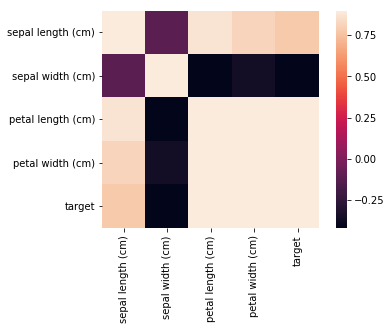

In [9]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=0.9, square=True)
corrmat[corrmat['target']>0.5]

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x_new = SelectKBest(chi2, k=3).fit_transform(x, y)

In [11]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x_new, y, random_state=0)

In [12]:
def tuningPara_crossValid1(model, param_grid):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(x1_train, y1_train)
    accuracy = grid_search.score(x1_test, y1_test)
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)

In [13]:
# Logistic Regression: parameter tuning & cross validation
# tunning parameters
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

tuningPara_crossValid1(LogisticRegression(), param_grid)

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.9821428571428571
The accuracy score is: 0.9736842105263158


In [14]:
# Random Forest: parameter tuning & cross validation
# tunning parameters 
# max_feature for classification problem is sqrt(n_features)
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}

tuningPara_crossValid1(RandomForestClassifier(max_features=2, n_jobs=-1), param_grid)

Best parameters: {'max_depth': 2, 'n_estimators': 4}
Best cross-validation score: 0.9642857142857143
The accuracy score is: 0.8947368421052632


In [15]:
# Decision Tree: parameter tuning & cross validation
param_grid = {'max_depth':[1, 2, 3, 4, 5]}
tuningPara_crossValid1(DecisionTreeClassifier(), param_grid)

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9736842105263158


## feature expansion

In [16]:
x=df.iloc[:, 0:4]
y=df.iloc[:, 4]

# pairwise interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
x=poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [17]:
def tuningPara_crossValid1(model, param_grid):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(x_train, y_train)
    accuracy = grid_search.score(x_test, y_test)
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)

# Logistic Regression: parameter tuning & cross validation
# tunning parameters
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

print('\n Logistic Regression \n')
print(tuningPara_crossValid1(LogisticRegression(), param_grid))

# Random Forest: parameter tuning & cross validation
# tunning parameters 
# max_feature for classification problem is sqrt(n_features)
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}
print('\n Random Forest \n')
print(tuningPara_crossValid1(RandomForestClassifier(max_features=2, n_jobs=-1), param_grid))

# Decision Tree: parameter tuning & cross validation
param_grid = {'max_depth':[1, 2, 3, 4, 5]}

print('\n Decision Tree \n')
print(tuningPara_crossValid1(DecisionTreeClassifier(), param_grid))


 Logistic Regression 

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9736842105263158
None

 Random Forest 

Best parameters: {'max_depth': 2, 'n_estimators': 5}
Best cross-validation score: 0.9642857142857143
The accuracy score is: 0.9736842105263158
None

 Decision Tree 

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9736842105263158
None


 ## combine feature selection (excluding petal-width) and feature expansion together

In [18]:
x=df.iloc[:, range(0,4)]
y=df.iloc[:, 4]
# feature selection
x = SelectKBest(chi2, k=3).fit_transform(x, y)

In [19]:
# feature expansion
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
x=poly.fit_transform(x)
x

array([[ 5.1 ,  1.4 ,  0.2 ,  7.14,  1.02,  0.28],
       [ 4.9 ,  1.4 ,  0.2 ,  6.86,  0.98,  0.28],
       [ 4.7 ,  1.3 ,  0.2 ,  6.11,  0.94,  0.26],
       [ 4.6 ,  1.5 ,  0.2 ,  6.9 ,  0.92,  0.3 ],
       [ 5.  ,  1.4 ,  0.2 ,  7.  ,  1.  ,  0.28],
       [ 5.4 ,  1.7 ,  0.4 ,  9.18,  2.16,  0.68],
       [ 4.6 ,  1.4 ,  0.3 ,  6.44,  1.38,  0.42],
       [ 5.  ,  1.5 ,  0.2 ,  7.5 ,  1.  ,  0.3 ],
       [ 4.4 ,  1.4 ,  0.2 ,  6.16,  0.88,  0.28],
       [ 4.9 ,  1.5 ,  0.1 ,  7.35,  0.49,  0.15],
       [ 5.4 ,  1.5 ,  0.2 ,  8.1 ,  1.08,  0.3 ],
       [ 4.8 ,  1.6 ,  0.2 ,  7.68,  0.96,  0.32],
       [ 4.8 ,  1.4 ,  0.1 ,  6.72,  0.48,  0.14],
       [ 4.3 ,  1.1 ,  0.1 ,  4.73,  0.43,  0.11],
       [ 5.8 ,  1.2 ,  0.2 ,  6.96,  1.16,  0.24],
       [ 5.7 ,  1.5 ,  0.4 ,  8.55,  2.28,  0.6 ],
       [ 5.4 ,  1.3 ,  0.4 ,  7.02,  2.16,  0.52],
       [ 5.1 ,  1.4 ,  0.3 ,  7.14,  1.53,  0.42],
       [ 5.7 ,  1.7 ,  0.3 ,  9.69,  1.71,  0.51],
       [ 5.1 ,  1.5 ,  0.3 ,  7

In [20]:
# feature selection
x_new = SelectKBest(chi2, k=4).fit_transform(x, y)
x1_train, x1_test, y1_train, y1_test = train_test_split(x_new, y, random_state=0)
x_new[0:5,:]

array([[1.4 , 7.14, 1.02, 0.28],
       [1.4 , 6.86, 0.98, 0.28],
       [1.3 , 6.11, 0.94, 0.26],
       [1.5 , 6.9 , 0.92, 0.3 ],
       [1.4 , 7.  , 1.  , 0.28]])

In [21]:
print("after feature expansion and selection")

def tuningPara_crossValid1(model, param_grid):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(x_train, y_train)
    accuracy = grid_search.score(x_test, y_test)
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)

# Logistic Regression: parameter tuning & cross validation
# tunning parameters
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}

print('\n Logistic Regression \n')
print(tuningPara_crossValid1(LogisticRegression(), param_grid))

# Random Forest: parameter tuning & cross validation
# tunning parameters 
# max_feature for classification problem is sqrt(n_features)
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}
print('\n Random Forest \n')
print(tuningPara_crossValid1(RandomForestClassifier(max_features=2, n_jobs=-1), param_grid))

# Decision Tree: parameter tuning & cross validation
param_grid = {'max_depth':[1, 2, 3, 4, 5]}

print('\n Decision Tree \n')
print(tuningPara_crossValid1(DecisionTreeClassifier(), param_grid))

after feature expansion and selection

 Logistic Regression 

Best parameters: {'C': 10, 'penalty': 'l1'}
Best cross-validation score: 0.9732142857142857
The accuracy score is: 0.9736842105263158
None

 Random Forest 

Best parameters: {'max_depth': 2, 'n_estimators': 3}
Best cross-validation score: 0.9553571428571429
The accuracy score is: 0.9736842105263158
None

 Decision Tree 

Best parameters: {'max_depth': 4}
Best cross-validation score: 0.9642857142857143
The accuracy score is: 0.9736842105263158
None


##  Observation

For Iris dataset, the best accuracy is after the combination of feature selection and expansion, and the accuracy score of LogisticRegression is the same as that of Random Forest and Decision Tree (0.9736842105263158). 
However, the best cross-validation score is LogisticRegression(0.9821428571428571) after feature selection.

### From Results of Feature selection
Feature selection can improve the performance of LogisticRegression. However, as for DecisionTree, tuning parameter can have a good performance enough even without feature selection. As for RandomForest, each features may have great impact on the target variables, so after selection, the accuracy is lower than that before selection. 

### From Results of Feature expansion
After feature expansion, the performance of LogisticRegression is improved. However, as for DecisionTree, the result contains the same. And as for RandomForest, the accuracy is instead declined. Feature expansion increases model complexity, which results in the data noise and overfitting problem. It may not suit for RandomForest, so the performance of RandomForest is not as good as before.

### Combine feature expansion and selection
After the combination of feature selection and expention the cross-validation accuracy has decreased in tree models but increases in LogisticRession model. The decrease may be attributed to the relativly large number of features, which is not suitable for complex tree models but better when fitting simpler models.

# II. Congressional Voting Records

In [22]:
# function of tuning parameters and cross validation 
def tuningPara_crossValid(model, param_grid, X_train, X_test, y_train, y_test):
    kfold = KFold(n_splits=5, random_state=0, shuffle=True)
    grid_search = GridSearchCV(model, param_grid, cv=kfold)
    grid_search.fit(X_train, y_train)
    accuracy = grid_search.score(X_test, y_test)
    model_after_tune = grid_search.best_estimator_
    print('Best parameters: {}'.format(grid_search.best_params_))
    print('Best cross-validation score:', grid_search.best_score_)
    print('The accuracy score is:', accuracy)
    return model_after_tune

In [23]:
voting = pd.read_csv('house-votes-84.csv', header=None)
voting.replace('n',0, inplace=True)
voting.replace('y',1, inplace=True)
voting.replace('?', 2,inplace=True)
voting.replace('republican', 0, inplace=True)
voting.replace('democrat', 1, inplace=True)
X_df= voting.iloc[:, range(1,17)]
y_df = voting.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=0)
voting.head()

FileNotFoundError: File b'house-votes-84.csv' does not exist

### 1. Logistic Regression: parameter tuning & cross validation

In [ ]:
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Before feature selection:')
LogRegModel = tuningPara_crossValid(LogisticRegression(), param_grid, X_train, X_test, y_train, y_test)

#### Model-Based Feature Selection (then fit model)

In [ ]:
print('\nAfter feature selection:')
model = SelectFromModel(LogisticRegression(), threshold='median')
model.fit(X_train, y_train)
X_train_l1 = model.transform(X_train)
X_test_l1 = model.transform(X_test)
print('Shape of X_train:', X_train_l1.shape)
LogRegModel = tuningPara_crossValid(LogisticRegression(), param_grid, X_train_l1, X_test_l1, y_train, y_test)

### 2. Random Forest: parameter tuning & cross validation

In [ ]:
print('Before feature selection:')
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}
RanForModel = tuningPara_crossValid(RandomForestClassifier(max_features=4, n_jobs=-1), param_grid, X_train, X_test, y_train, y_test)

#### Feature Selection: Univariate Statistics (50% percentile) (then fit model)

In [ ]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50) 
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("feature selected result:",select.get_support())

print('after feature selection:')
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}
RanForModel = tuningPara_crossValid(RandomForestClassifier(max_features=4, n_jobs=-1), param_grid, X_train_selected, X_test_selected, y_train, y_test)

### 3. Decision Tree: parameter tuning & cross validation

In [ ]:
param_grid = {'max_depth':[1, 2, 3, 4, 5]}
clf = DecisionTreeClassifier()
print('before feature selection:')
DecTreeModel = tuningPara_crossValid(clf, param_grid, X_train, X_test, y_train, y_test)

#### Feature Selection: Iterative Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
print('After feature selection:')
select = RFE(clf, n_features_to_select=8)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)
X_test_selected = select.transform(X_test)
print("X_train_selected.shape: {}".format(X_train_selected.shape))
print("feature selected result:",select.get_support())
DecTreeModel = tuningPara_crossValid(clf, param_grid, X_train_selected, X_test_selected, y_train, y_test)

## Feature Expantion

In [ ]:
# pairwise interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_exp_inter=poly.fit_transform(X_df)
print('Train dataset size after pairwise interactions(interaction_only):', X_exp_inter.shape)

In [ ]:
# Feature expansion, interaction_only=False
poly=PolynomialFeatures(interaction_only=False, include_bias = False)
X_exp_inter_false=poly.fit_transform(X_df)
print('Train dataset size after pairwise interactions(interaction_only=False):', X_exp_inter_false.shape)
X_exp=poly.fit_transform(X_df)

The number of feature is too large than before which is not good for prediction because the number of datasets is not very large. Thus, we want to do feature selection combine with feature selection.

## Combine feature selection (excluding petal-width) and feature expansion together

In [ ]:
def feature_selection_chi(n_features, X, y):
    select_chi = SelectKBest(chi2, k=n_features)
    X_chi_sele = select_chi.fit_transform(X, y)
    print(select_chi.get_support())
    X_train, X_test, y_train, y_test = train_test_split(X_chi_sele, y, random_state=0)
    return X_train, X_test, y_train, y_test
## feature selection from features after doing feature expantion
X_train1, X_test1, y_train1, y_test1 = feature_selection_chi(25, X_exp_inter, y_df)
X_train2, X_test2, y_train2, y_test2 = feature_selection_chi(25, X_exp_inter_false, y_df)

In [ ]:
## fit models, do cross-validation and calculate accuracy scores after feature engineering
print('Logistic regression model:')
param_grid = {'penalty':['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print('\nThe result of interaction_only:')
LogRegModel = tuningPara_crossValid(LogisticRegression(), param_grid, X_train1, X_test1, y_train1, y_test1)
print('\nThe result of interaction_only=false:')
LogRegModel = tuningPara_crossValid(LogisticRegression(), param_grid, X_train2, X_test2, y_train2, y_test2)

In [ ]:
print('Random Forest model :')
param_grid = {'n_estimators': [2, 3, 4, 5],
              'max_depth':[2, 3, 4, 5]}
print('\nThe result of interaction_only:')
RanForModel = tuningPara_crossValid(RandomForestClassifier(max_features=4, n_jobs=-1), param_grid, X_train1, X_test1, y_train1, y_test1)
print('\nThe result of interaction_only=false:')
RanForModel = tuningPara_crossValid(RandomForestClassifier(max_features=4, n_jobs=-1), param_grid, X_train2, X_test2, y_train2, y_test2)

In [ ]:
param_grid = {'max_depth':[1, 2, 3, 4, 5]}
clf = DecisionTreeClassifier()
print('before feature selection:')
print('\nThe result of interaction_only:')
DecTreeModel = tuningPara_crossValid(clf, param_grid, X_train1, X_test1, y_train1, y_test1)
print('\nThe result of interaction_only=false:')
DecTreeModel = tuningPara_crossValid(clf, param_grid, X_train2, X_test2, y_train2, y_test2)

## Oberservation

For Congressional Voting dataset, the best accuracy is given by LogisticRegression (0.9724770642201835) with the combination of feature selection and expantion.

### From Results of Feature selection
Feature selection can improve the performance of LogisticRegression. However, as for RandomForest and DecisionTree, tuning parameter can have a good performance enough even without feature selection.

### From Results of Feature expantion
The number of feature is too large than before which is not good for prediction because the number of datasets is not very large. Thus, we want to do feature selection combine with feature selection.

### Combine feature expention and selection
After the combination of feature selection and expention the accuracy has decreased in tree models but increase in LogisticRession model. The decrease may be attributed to the relativly large number of features, which is not suitable for complex tree models but better when fitting simpler models.